# THE STAR WARS FILMS FRANCHISE

While waiting for the Star Wars VII: The Force Awakens to come out, the team at <a href="url">https://github.com/fivethirtyeight</a> collected data through online survey to assess the popularity of each individual film in Star Wars. They published their data on github, which you can download from their GitHub repository. 

Based on their data, we will try to determine the most favorite film and character in Star Wars franchise.

# Data Cleaning

We will first try to set up our environment by importing tools that can support us along the way

In [1]:
import numpy as np                                              ##Importing numpy library
import matplotlib.pyplot as plt                                 ##Importing matplotlib library
import seaborn as sns                                           ##Importing seaborn library
import pandas as pd                                             ##Importing pandas library
%matplotlib inline                                              
sns.set_style('darkgrid')                                       ##Set our general style to 'darkgrid'

Importing our data sets from excel files and set our display to 50 columns so that we can see our dataset as a whole. We will then look at our first 3 rows in the dataset


In [2]:
star_wars = pd.read_csv('StarWars.csv',encoding='ISO-8859-1')            ##Importing our excel file
pd.options.display.max_columns = 50                                      ##Enable us to see all columms
star_wars.head(3)                        

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


Lets understand more about our dataset:

|Column Name|Description|
|:--------|:----------
|`RespondentID`|An anonymized ID for the respondent (person taking the survey)
|`Gender`|The respondent's gender
|`Age`|The respondent's age
|`Household Income`|The respondent's income
|`Education`|The respondent's education level
|`Location (Census Region)`|The respondent's location
|`Have you seen any of the 6 films in the Star Wars franchise?`|Has a Yes or No response
|`Do you consider yourself to be a fan of the Star Wars film franchise?`|Has a Yes or No response


After reading the first few columns of the data frame. We found out that there are more than 20 Unnamed columns that might be an obstacle for us to analyse the data. Hence, we will try to change our column names by looking for relevant data. For example, if we look at Unnamed 16 to Unnamed 28, we found out that the first row contains the character names while other rows contains strings. 

We will change Unnamed 16 to Unnamed 28 columns names by replacing with character names.

In [3]:
column_names = list(star_wars.iloc[:,15:29].columns)                      ##Extracting the column names
char_names = list(star_wars.iloc[0,15:29])                                ##Extracting the character names
char_names_dict = {}                                                      ##Creating an empty dictionary 
i = 0
for c in column_names:                                                    ##Loop over column names
    char_names_dict[c] = char_names[i]                                    ##Appending keys and values to
    i += 1
star_wars.rename(char_names_dict,axis=1,inplace=True)                     ##Renaming from Unnamed 16 to Unnamed 28 with character names

Since our first row has few non null datas, while some of it contains different data from other rows. We decided not to use it and delete from our dataset

In [4]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]         ##First row is the only with with no value for RespondentID

As we look to other column names, we will notice that there are still few other Unnamed columns such as Unnamed 4 to Unnamed 14. Therefore, we will dig deeper into these particular columns

In [5]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?æ',
       'Do 

 Based on FiveThirtyEight github, six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

 The columns for this question are:
 
|columns|descriptions|
|:--------|:----------
|Which of the following Star Wars films have you seen? Please select all that apply. | Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
|Unnamed: 4 | Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
|Unnamed: 5 | Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
|Unnamed: 6 | Whether or not the respondent saw Star Wars: Episode IV A New Hope.
|Unnamed: 7 | Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
|Unnamed: 8 | Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

We will change these column names with `seen_?` where '?' is the episode of the franchise

In [6]:
column_names = list(star_wars.iloc[:,3:9].columns)                  ##Extracting our column names
rename_dict = {}                                                    ##Create an empty dictionary

i = 1
for cn in column_names:                                             ##Loop over column names
    rename_dict[cn] = 'seen_{}'.format(i)                           ##Generating a dictionary with column names as keys and seen_? as values
    i += 1
star_wars.rename(rename_dict,axis=1,inplace=True)                   ##Changing our column names

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

|Columns | Descriptions|
|:--------|:----------
|Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. |How much the respondent liked Star Wars: Episode I The Phantom Menace
|Unnamed: 10 | How much the respondent liked Star Wars: Episode II Attack of the Clones
|Unnamed: 11 | How much the respondent liked Star Wars: Episode III Revenge of the Sith
|Unnamed: 12 | How much the respondent liked Star Wars: Episode IV A New Hope
|Unnamed: 13 | How much the respondent liked Star Wars: Episode V The Empire Strikes Back
|Unnamed: 14 | How much the respondent liked Star Wars: Episode VI Return of the Jedi

Therefore, we will changing from Unnamed columns to rank_? where '?' is the episode in the franchise

In [7]:
rank_cols = list(star_wars.iloc[:,9:15].columns)
rank_dict = {}
i = 1
for rc in rank_cols:                                                ##Generating a dictionary contains our old names and new names
    rank_dict[rc] = 'rank_{}'.format(i)
    i += 1
star_wars.rename(rank_dict,axis=1,inplace=True)  

In [8]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Checking our columns names, we can see that it is much easier to understand than before. We will continue to our path to clean data. If we look at the first 5 rows in the dataset, the columns 2,3,31,32,33 contains Yes/No/NaN answers, which could be turned into a boolean values True/False/NaN. Whereas columns 4 to 9 contains names of movie, which tells that the responder had watched the movie, we can turn also this into boolean values where name of the movie is True, while NaN is False

In [9]:
##Lets first change our columns 2,3,31,32,33 from Yes/No/NaN to True/False/NaN

yes_no = {        
    'Yes' : True,
    'No'  : False,    
}
cols = [1,2,30,31,32]
for c in cols:                                                 ##Loop over each column
    star_wars.iloc[:,c] = star_wars.iloc[:,c].map(yes_no)      ##Changing our values into boolean values
for c in cols:      
    print(star_wars.iloc[:,c].value_counts(dropna=False))      ##Checking if we had done correctly
    print('\n') 

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


False    615
NaN      358
True     213
Name: Are you familiar with the Expanded Universe?, dtype: int64


NaN      973
False    114
True      99
Name: Do you consider yourself to be a fan of the Expanded Universe?æ, dtype: int64


False    641
True     427
NaN      118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64




We will continue to work with column 4 to 9 by changing Movie name and NaN values into boolean values

In [10]:
movie_names  = list(star_wars.iloc[0,3:9])                           ##Extracting movie names from column 4 to 9
movie_names
def to_bool(movie):                                                  ##Creating definition
    if movie in movie_names:                                         ##If the cell contains movie names then it is True
        return True
    else:                                                            ##If the cell not contains movie names then it is False
        return False
star_wars.iloc[:,3:9] = star_wars.iloc[:,3:9].applymap(to_bool)      

After finish cleaning our first 9 columns, we shall check our next 6 columns. Since there only contains numeric values, the data itself seems to be clean. However, we should check if it is in a string type or integer type

In [11]:
star_wars[star_wars.columns[9:15]].dtypes                           ##Checking types of columns 9 to 14

rank_1    object
rank_2    object
rank_3    object
rank_4    object
rank_5    object
rank_6    object
dtype: object

Unfotunately, it is in object or called the string type. Therefore, we will have to change it into the float type.

In [12]:
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)       ##Changing type of columns 9 to 14 to float type

Lets check our dataset again

In [13]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Our first 15 columns has been changed into usable data for analysing. Looking into character names columns, we notice that our results are in string objects, which will not help much to our analysing process. Therefore, we shall transform our string objects into numerical values.Lets check our data to see how we going to transform.


In [14]:
star_wars.iloc[:,15].value_counts(dropna=False)          ##Checking unique values from character name columns

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64

As we can see, our unique values can be divided into 4 groups:  Favorable,Unfavorable,Neutral,Unfamiliar. We can transform this into numerical values

|Type|Numerical Values|
|:--------|:----------
|Favorable|1
|Unfavorable|2
|Neutral|3
|Unfamiliar|4

In [15]:
def to_number(string):                                                          
    if 'Very favorably' == string or 'Somewhat favorably' == string:               ##Return 1 if somewhat love the character
        return 1
    elif 'Somewhat unfavorably' == string or 'Very unfavorably' == string:         ##Return 2 if somewhat hate the character
        return 2
    elif 'Neither favorably nor unfavorably (neutral)' == string:                  ##Return 3 if not have strong sentiment
        return 3
    elif 'Unfamiliar (N/A)' or np.nan == string:                                   ##Return 4 if not familar or lost value
        return 4
star_wars.iloc[:,15:29] = star_wars.iloc[:,15:29].applymap(to_number)     
star_wars.head(3)                                                                  ##checking our works

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,1,1,1,1,1,1,1,4,4,1,1,1,1,1,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,4,4,4,4,4,4,4,4,4,4,4,4,4,4,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,1,1,1,1,1,4,4,4,4,4,4,4,4,4,I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central


# Movies Analysis

Moving to analysis stage, we would like to see which Star Wars film is believed to be the worst/best and which one is most viewed by the respondents.

In [16]:
starwars_names = []                                       ##Generating the Star War movie names
for i in ['I','II','III','IV','V','VI']:
    name = 'Star Wars {}'.format(i)
    starwars_names.append(name)
starwars_names                                            ##Checking our starwars names


['Star Wars I',
 'Star Wars II',
 'Star Wars III',
 'Star Wars IV',
 'Star Wars V',
 'Star Wars VI']

## Most Hated Star Wars Movie

In this part, we are going to analyse the survey provided by FiveThirtyEight to see which Star Wars film does the viewer hate the most. We are going to create a simple bar plot for each movie. To remind us, the survey asked a total of 1186 individuals how much do they hate each film in the Star Wars franchise. Therefore, the higher the rating, the worse the movie is.

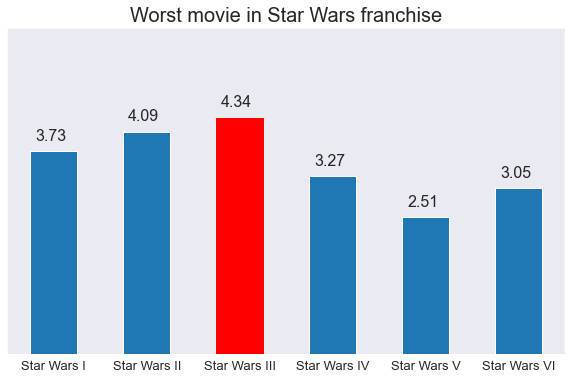

In [17]:
plt.figure(figsize=(10,6))
ax = star_wars.iloc[:,9:15].mean().plot.bar(ylim=(0,6),position=0)               ###Generating a bar plot with a limit of 6 y-values

num = list(star_wars.iloc[:,9:15].mean().astype(float))                          ###Generating a list of percentage number
for i in range(0,6):                                                             ###Adding percentage number to each bar
    x = i + 0.05
    y = num[i] + 0.2
    string = str(round(num[i],2))
    ax.text(x,y,string,fontsize=16)
ax.get_children()[2].set_color('r')                                              ###Set 2nd plot to color red
ax.grid(False)                                                                   ###Remove grid
ax.set_yticks([])                                                                ###Set y tick labels
ax.set_xticks(np.arange(0,6)+0.25)                                               ###Set x tick postions
ax.set_xticklabels(starwars_names,fontsize=13,rotation=0)                        ###Set x tick labels
plt.title('Worst movie in Star Wars franchise',fontsize=20,fontweight=525)       ###Set plot title 
plt.show()

### Result

Based on our result, we can see that the 3 oldest Star Wars movie were not as good as the later 3. While the most hated one was 'Star Wars III: Revenge of the Sith' at 4.34, viewers loved 'Star Wars V: The Empire Strikes Back' most at 2.51.

## Most Viewed Star Wars Movie

If you are a fan of Star Wars film franchise, you would be curious to know which movie was the hottest so that you could have a conversation with your friends about it. Fortunately, FiveThirtyEight provided us with data to see which movies have they watched. We want to be selective about this data, we going to choose rows/responder who have watched at least 1 movie in the Star Wars movies franchise.

We going to select rows that based on 'Have you seen any of the 6 films in the Star Wars franchise?' and we only going to choose rows with True values.

In [18]:
seen_any = star_wars[star_wars['Have you seen any of the 6 films in the Star Wars franchise?']]
seen_any.shape

(936, 38)

Since there are 936 rows, there are 936 viewers who have watched Star Wars. We going to generate bar plots to see the percentage of 936 viewers who have watched each Star Wars movie.

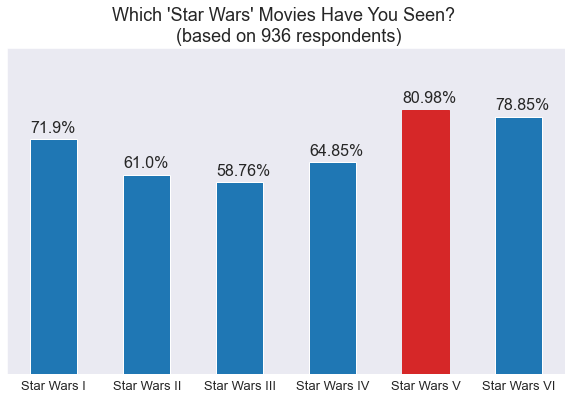

In [19]:
plt.figure(figsize=(10,6))                                                     ##
ax = seen_any.iloc[:,3:9].sum().plot.bar(ylim=(0,936),position=0)             ###Generating bar plots with a limit of 936 for y values

num = list(seen_any.iloc[:,3:9].sum().astype(int))                            ###Generating a list of percentage numbers
for i in range(0,6):                                                          ###Adding text to each bar
    x = i
    y = num[i]+20
    string = str(round(num[0+i]/936 *100,2)) +'%'
    ax.text(x,y,string,fontsize=16)

ax.get_children()[4].set_color('#D62728')                                      ###Set fifth bar plot to #D62728
ax.grid(False)                                                                 ###Remove grids
ax.set_yticks([])                                                              ###Remove y tick labels
ax.set_xticks(np.arange(0,6)+0.25)                                             ###Set x tick labels positions
ax.set_xticklabels(starwars_names,rotation=0,fontsize=13)                      ###Set x tick labels name 
plt.title('Which \'Star Wars\' Movies Have You Seen? \n (based on 936 respondents)',fontsize=18,fontweight=525)
plt.show()

### Result

As we might have guessed from our previous analyse, 'Star Wars V: The Empire Strikes Back' was the most popular movie within the franchise, while 'Star Wars III: Revenge of the Sith' remained the least successful of all 6 movies. The next 2 popular movies were Star Wars VI and Star Wars I. This may have proved that many of the viewers had skipped the other middle movies.

## Most Favorite Star Wars Movie Based on Fans

We may have known the most popular and the most loved movies. But the survey provided information whether the viewer had watched all of the Star Wars movies. This could help us to help a clearer view of the Star Wars movies by determining the best 1 out of 6 based on individuals who have watched all 6 of them

We would want to select rows that all 6 'seen_?' columns were answered True

In [20]:
star_wars['seen_all'] = star_wars.iloc[:,3:9].all(axis=1)
print('There are',star_wars['seen_all'].sum(),'out of 1186 viewers who have watched all 6 movies')

There are 471 out of 1186 viewers who have watched all 6 movies


Lets check how the first 5 people chose their favorite movie, for 1 is the most favorite while 6 is the least

In [21]:
rank_seen_all = star_wars[star_wars['seen_all']].iloc[:,9:15]
rank_seen_all.head(5)

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6
1,3.0,2.0,1.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
6,1.0,4.0,3.0,6.0,5.0,2.0
7,6.0,5.0,4.0,3.0,1.0,2.0


We should create rows where it shows the sum of rows that contains 1 for each movie(column). Ultimately, we would like to create percentage rows to compared 6 movies as a whole.

In [22]:
rank_seen_all.loc['1_counts'] = (rank_seen_all == 1).sum(axis=0)                        ###Counting 1 for each column 
rank_seen_all.loc['1_counts_per'] = round(rank_seen_all.loc['1_counts']/ 471 *100,2)    ### round (1_counts/471 * 100) to 2 figures after ,
pd.DataFrame(rank_seen_all.loc[['1_counts','1_counts_per']])

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6
1_counts,47.00,18.00,27.00,128.00,169.00,82.00
1_counts_per,9.98,3.82,5.73,27.18,35.88,17.41


Since it is easier to compare through visualizations, we shall generate 4 bar plots to see which movie was the most favored based on people who have watched all 6 movies.

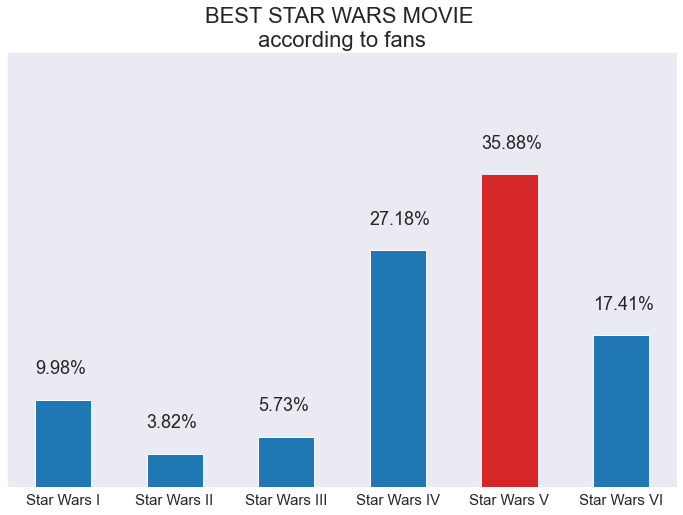

In [23]:
plt.figure(figsize=(12,8))
ax = rank_seen_all.loc['1_counts_per'].plot.bar(ylim=(0,50),position=0)
ax.set_xticks(np.arange(0,6))

num = list(rank_seen_all.loc['1_counts_per'])
for i in range(0,6):                                                     ###Generating percentage numbers for each figure
    x = i
    y = num[i]+3
    string = str(num[i]) + '%'
    ax.text(x,y,string,fontsize=18)
    
ax.get_children()[4].set_color('#D62728')                                ###Fifth bar will be set to a #D62728 color
ax.grid(False)                                                           ###Remove grid
ax.set_yticks([])                                                        ###Remove y ticks
ax.set_xticks(np.arange(0,6)+0.25,)                                      ###Set positions for x ticks labels
ax.set_xticklabels(starwars_names,rotation=0,fontsize=15)                ###Set x tick labels
plt.title('BEST STAR WARS MOVIE \n according to fans ',fontsize=22,fontweight=525)
plt.show()

### Result

It is no doubt that Star Wars: The Empire Strikes Back was again have the highest rates of people who loved it. However, people who have watched all 6 movies believed that Star Wars II was worsen than Star Wars III, which we got a different result compared to our last 2 graphs.

## Favorite Characters

We have done our researches for movies, we move on to how the viewers felt about a number of the franchise's characters in terms of favorability. We will be selecting those respondents who have actually watched a Star Wars movie which is 936 viewers, based on our previous findings. 

We will filter rows and columns based on our criteria, choosing character columns and rows that contains True value in 'Have you seen any of the 6 films in the Star Wars franchise?'

In [24]:
all_characters = seen_any.iloc[:,15:29].T          ## We will work with a subset of our dataset called all_characters
all_characters

,1,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,...,1156,1157,1159,1161,1162,1163,1164,1165,1166,1167,1168,1170,1172,1173,1174,1175,1176,1177,1178,1180,1181,1182,1183,1185,1186
Han Solo,1,1,1,1,1,1,1,1,3,4,1,1,1,1,3,1,1,1,1,3,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1
Luke Skywalker,1,1,1,1,1,1,1,2,1,4,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,1,1,1,1,1,3,1
Princess Leia Organa,1,1,1,1,1,1,1,1,1,4,1,1,1,1,2,1,1,1,1,3,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1
Anakin Skywalker,1,1,1,2,1,1,3,1,1,4,1,1,1,2,3,1,1,1,1,3,3,2,1,1,1,...,1,1,3,1,1,2,3,1,1,1,1,3,1,1,1,1,1,3,1,3,1,1,2,1,2
Obi Wan Kenobi,1,1,1,1,1,1,1,1,1,4,1,1,1,1,2,1,1,1,1,3,1,1,1,1,1,...,1,1,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1
Emperor Palpatine,1,4,1,2,3,1,2,1,2,4,1,4,2,1,1,1,1,2,3,3,2,1,1,1,2,...,4,1,3,1,1,1,4,1,4,2,4,1,1,3,1,4,3,3,3,3,1,1,3,3,2
Darth Vader,1,4,1,1,1,1,2,1,1,4,1,2,2,1,2,1,1,1,1,3,1,1,1,1,2,...,1,2,1,1,2,2,2,2,1,1,1,1,1,2,1,1,1,3,3,2,1,1,2,1,1
Lando Calrissian,4,4,1,3,3,1,3,1,2,4,3,4,2,1,3,3,1,2,3,3,1,3,1,1,1,...,1,3,3,1,3,3,1,1,1,4,4,1,2,3,4,4,3,3,4,3,1,1,1,1,2
Boba Fett,4,4,2,1,1,1,1,1,2,4,1,3,2,1,1,1,1,1,1,3,2,3,1,1,2,...,1,1,3,1,3,2,2,3,1,1,4,1,2,3,1,4,1,3,4,3,1,1,4,1,4
C-3P0,1,4,1,1,1,1,1,3,1,4,1,1,1,2,3,1,1,1,1,3,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1


Since we going to analyse which character is most loved and hated, it would be easier for us to have columns that show percentage of each favorability for each character according to our viewers.

We shall be generating 2 groups of 4 collumns, 1 group for counts while other percentage of favorabilities

In [25]:
cols = ['Favorable', 'Unfavorable', 'Neutral', 'Unfamiliar']
cols_perc = ['Favorable_perc', 'Unfavorable_perc', 'Neutral_perc', 'Unfamiliar_perc']
i = 0
for c in cols:                                                            ###Creating our sum columns
    i += 1
    all_characters[c] = (all_characters == i).sum(axis=1)                 ###Count columns that contains 1,2,3 or 4
i = 0
for cp in cols_perc:                                                      ###Creating our percentage columns
    all_characters[cp] = all_characters[cols[i]] / 936 * 100              ###Sum columns/936 * 100
    all_characters[cp] = round(all_characters[cp],2)                      ###Round the percentage columns to 4 sig figures
    i += 1

Lets check the data for our newly generated columns

In [26]:
all_characters[cols+cols_perc].sort_values('Favorable_perc',ascending=True)

,Favorable,Unfavorable,Neutral,Unfamiliar,Favorable_perc,Unfavorable_perc,Neutral_perc,Unfamiliar_perc
Jar Jar Binks,242,306,164,224,25.85,32.69,17.52,23.93
Emperor Palpatine,253,192,213,278,27.03,20.51,22.76,29.70
Boba Fett,291,141,248,256,31.09,15.06,26.50,27.35
Padme Amidala,351,92,207,286,37.50,9.83,22.12,30.56
Lando Calrissian,365,71,236,264,39.00,7.59,25.21,28.21
Darth Vader,481,251,84,120,51.39,26.82,8.97,12.82
Anakin Skywalker,514,122,135,165,54.91,13.03,14.42,17.63
C-3P0,703,30,79,124,75.11,3.21,8.44,13.25
R2 D2,747,16,57,116,79.81,1.71,6.09,12.39
Yoda,749,16,51,120,80.02,1.71,5.45,12.82


From the percentage columns, we going to determine the most hated as well as the most loved character in the Star Wars film franchise. We will generate 4 horizontal bar plots that showed percentage of how each character was voted on whether being Favorable, Unfavorable, Neutral or Unfamiliar

In [27]:
all_characters = all_characters.sort_values('Favorable',ascending=True)

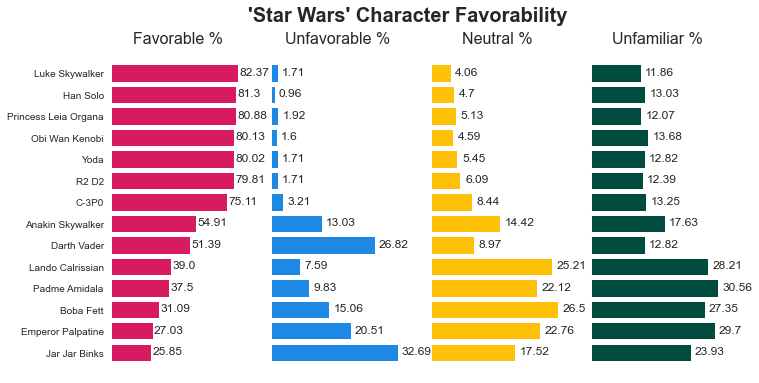

In [28]:
sns.set_style('whitegrid')                                             ###Set to a whitegrid style from seaborn library
char_names = all_characters.index
popularity = ['Favorable', 'Unfavorable', 'Neutral', 'Unfamiliar']
popularity_perc = ['Favorable_perc', 'Unfavorable_perc', 'Neutral_perc', 'Unfamiliar_perc']
color = ['#D81B60','#1E88E5','#FFC107','#004D40']

###Add a layout to prepare our plots
fig = plt.figure(figsize=(11,6))
i = 0


for pp in popularity_perc:
    i += 1
    ax = fig.add_subplot(1,4,i)                                         ###Generating 4 plots with 4 columns and 1 row
    ax.barh(char_names,all_characters[pp],color=color[i-1])             ###Generating bar plots with character names and color
    ax.grid(False)                                                      ###Remove grid
    ax.set_xticks([])                                                   ###Remove X tick labels
    ax.set_title(popularity[i-1] +' %',fontsize=16,fontweight=525)      ###Set title for each of 4 bar plots

    
    if i != 1:                                                          ###Only the first bar plot have character names
        ax.set_yticks([])
        

    perc_labels = list(all_characters[pp])                              ###Add percentage numbers for all figures
    y = -0.1
    for pl in perc_labels:
        x = pl + 1
        string = str(pl)
        ax.text(x,y,string,fontsize=12)
        y += 1
        
        
    for key,spine in ax.spines.items():                                 ###Remove all 4 borders 
        spine.set_visible(False)
plt.suptitle('\'Star Wars\' Character Favorability',fontweight='bold',fontsize=20)           ###Creating an overall title
plt.show()  

### Result

Based on our findings, Luke Skywalker,Han Solo were the most favorable characters while Jar Jar Binks and Darth Vader was the most hated character in the Star Wars movies franchise. Most people werent familar with Padme Amidala and Emperor Palpatine whereas Princess Leia Organa,Yoda and R2 D2 were among the most popular characters.

<h1>Conclusion</h1>
<p>Based on the online survey from FiveThirtyEight and our research,we saw that the fifth installment of the film franchise, The Empire Strikes Back, was considered to be the best movie out of the other 5 mentioned films, whereas the third movie, Revenge of the Sith, was believed to be the least favorite movie in the franchise. We also found out that Luke Skywalker, the main protagonist was the top most favorable character while Jar Jar Binks was the utmost disliked character of all </p>